# Heuristic Miner

## Step 1: Handling and import event data

In [1]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

#log_path = os.path.join("tests", "compressed_input_data", "09_a32f0n00.xes.gz")
log = xes_importer.apply("../Sepsis_after.xes")

parsing log, completed traces ::   0%|          | 0/924 [00:00<?, ?it/s]

## Step 2: Mining event log - Process Discovery

In [2]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

## Step 3: Visualize the Heuristic Net

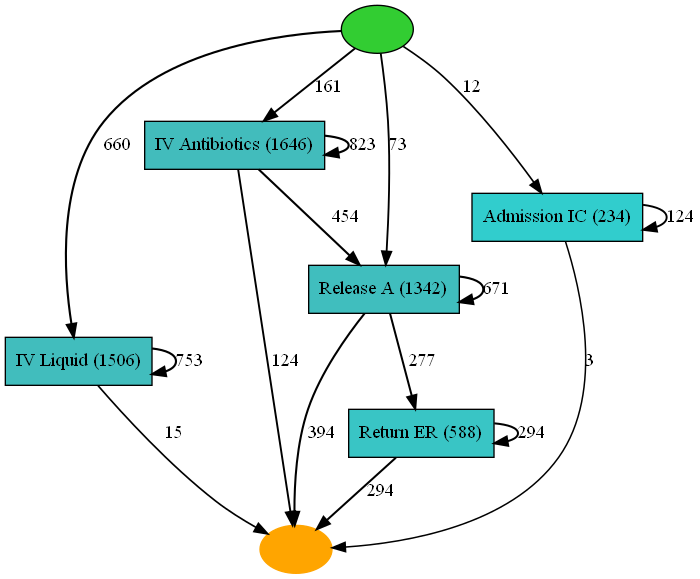

In [3]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

## Step 4: Convert Heuristic Net to Petri Net and BPMN

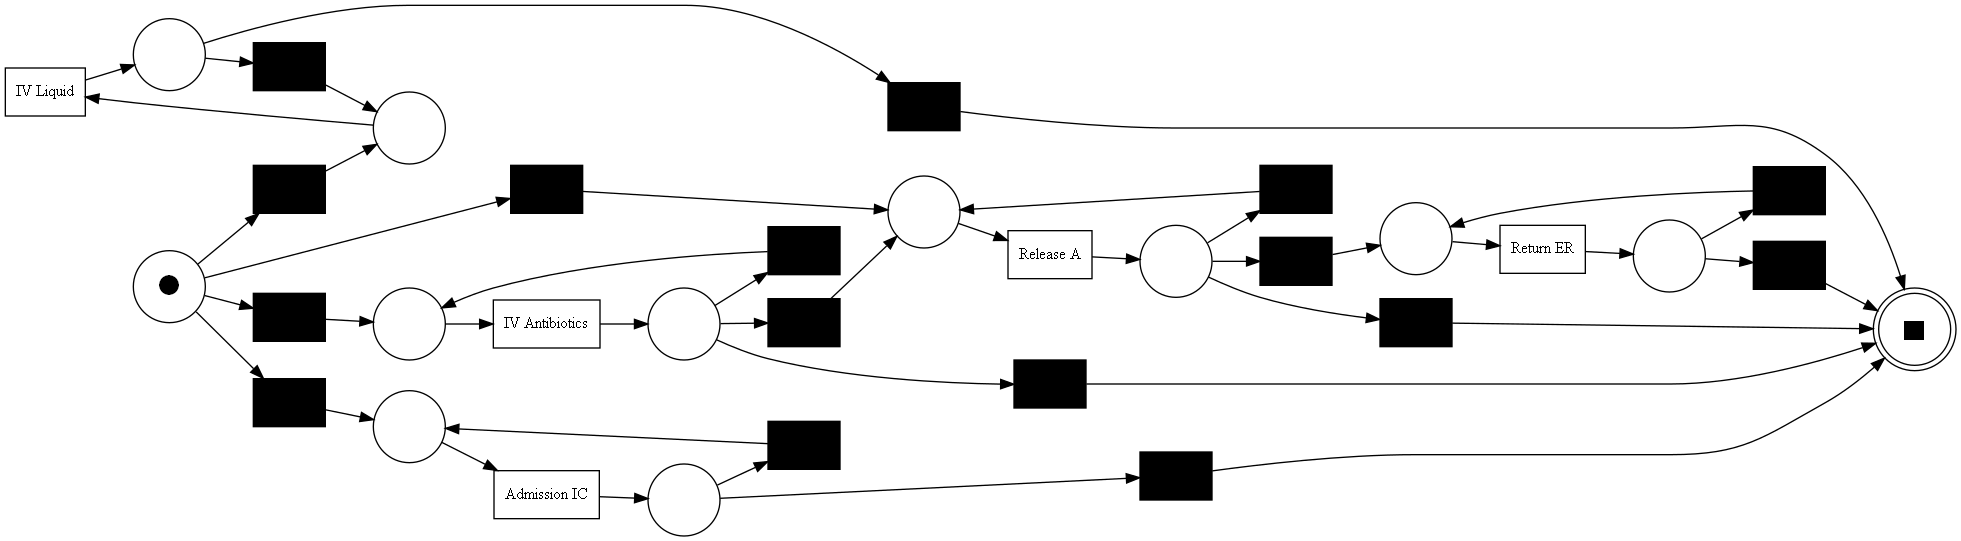

In [4]:
# To obtain a Petri Net that is based on the Heuristics Miner, the code on the right hand side can be used. Also this Petri Net can be visualized.
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, initial_marking, final_marking = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

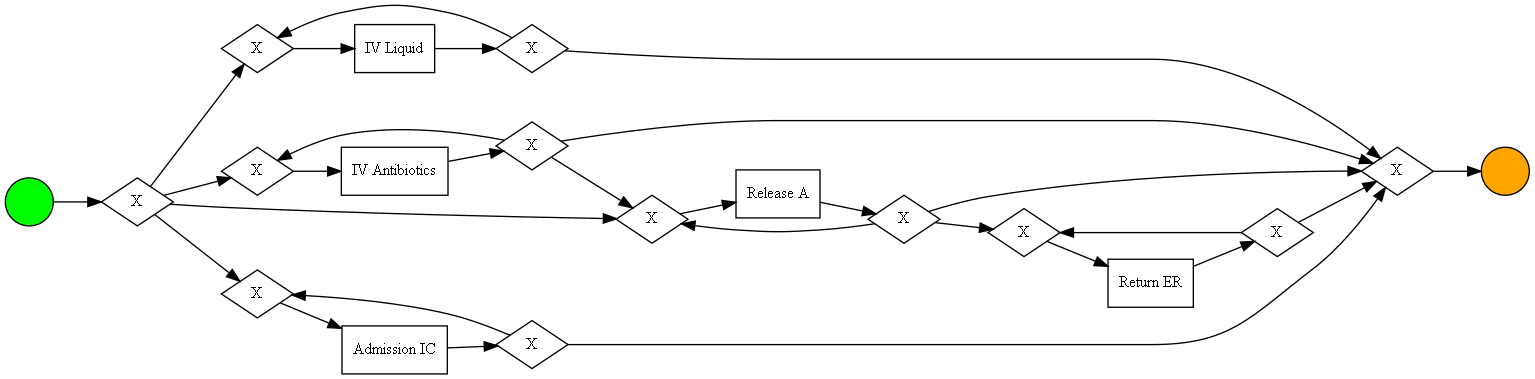

In [5]:
bpmn_graph = pm4py.convert_to_bpmn(*[net, initial_marking, final_marking])
pm4py.view_bpmn(bpmn_graph, "png")

## Step 5: Log-Model Evaluation

### Replay Fitness

In [6]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

replaying log with TBR, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

In [7]:
fitness

{'perc_fit_traces': 14.61038961038961,
 'average_trace_fitness': 0.9074706611471343,
 'log_fitness': 0.9227449287872249,
 'percentage_of_fitting_traces': 14.61038961038961}

### Precision

In [8]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

replaying log with TBR, completed variants ::   0%|          | 0/86 [00:00<?, ?it/s]

In [9]:
prec

0.7999346191565871

### F-measure

In [10]:
def f_measure(f, p):
    return (2*f*p)/(f+p)

f_measure(fitness['average_trace_fitness'], prec)

0.8503162150129694